<a href="https://colab.research.google.com/github/18K41A0476/NNDL/blob/main/Assignment_5(NNDL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from sympy import Symbol, Derivative, symbols
m= Symbol('m')
c= Symbol('c')
function = '0.5*(y-m*x-c)**2'
partial_deriv= Derivative(function, m)
dfm = partial_deriv.doit()
partial_deriv= Derivative(function, c)
dfc = partial_deriv.doit()
x1 = [0.2,0.4,0.6,0.8]
y1 = [2.4,3.8,4.2,4.6]

print(f'first order derivatives of given function are de/dm = {dfm} ,de/dc = {dfc}')

#step 1 initialise values
bs = 2 #batch size
m1 = 1.0 
c1 = -1.0  
itr = 1000  
learning_rate = 0.1  

ns = len(x1)
nb = ns//bs
ms = ns%bs


for i in range(0,itr):
    for k in range(0,nb):
        df_dm1 = 0
        df_dc1 = 0
        for j in range(0,bs):
            index = k*bs + j
            #step 2 substitute x ,y in first order derivatives df/dx, df/dy
            m = symbols('m')
            c = symbols('c')
            x = symbols('x')
            y = symbols('y')
            df_dm = dfm.subs(m, m1) 
            df_dm = df_dm.subs(c, c1) 
            df_dm = df_dm.subs(x, x1[index]) 
            df_dm = df_dm.subs(y, y1[index]) 
            df_dm = round(df_dm,2)
            df_dc = dfc.subs(c, c1) 
            df_dc = df_dc.subs(m, m1) 
            df_dc = df_dc.subs(x, x1[index]) 
            df_dc = df_dc.subs(y, y1[index]) 
            df_dc = round(df_dc,2)
            df_dm1 += df_dm
            df_dc1 += df_dc
            
        df_dm1 = df_dm1/bs
        df_dc1 = df_dc1/bs

        df_dm1 = round(df_dm1,2)
        df_dc1 = round(df_dc1,2)
        #step3 find change in x , y
        dm = (-1.0)*learning_rate*df_dm1
        dc = (-1.0)*learning_rate*df_dc1
        #step4 update variable 
        m1 = m1 + dm 
        c1 = c1 + dc
        #step5 increment iterations 
        #step6 break loop if iterations exceed no of epoches
k = nb
if(ms>0):
    df_dm1 = 0
    df_dc1 = 0
    for j in range(0,ms):
        index = k*bs + j
        #step 2 substitute x ,y in first order derivatives df/dx, df/dy
        m = symbols('m')
        c = symbols('c')
        x = symbols('x')
        y = symbols('y')
        df_dm = dfm.subs(m, m1) 
        df_dm = df_dm.subs(c, c1) 
        df_dm = df_dm.subs(x, x1[index]) 
        df_dm = df_dm.subs(y, y1[index]) 
        df_dc = dfc.subs(c, c1) 
        df_dc = df_dc.subs(m, m1) 
        df_dc = df_dc.subs(x, x1[index]) 
        df_dc = df_dc.subs(y, y1[index]) 
        df_dm1 += df_dm
        df_dc1 += df_dc

    df_dm1 = df_dm1/ms
    df_dc1 = df_dc1/ms

    #step3 find change in x , y
    dm = (-1.0)*learning_rate*df_dm1
    dc = (-1.0)*learning_rate*df_dc1
    #step4 update variable 
    m1 = m1 + dm 
    c1 = c1 + dc
#step7 print variable x1, y1
m1= round(m1,2)
c1= round(c1,2)
print(m1, c1)
print(f'minimum value obtained at m = {m1} ,c ={c1} for given function')


first order derivatives of given function are de/dm = -1.0*x*(-c - m*x + y) ,de/dc = 1.0*c + 1.0*m*x - 1.0*y
3.33 2.09
minimum value obtained at m = 3.33 ,c =2.09 for given function


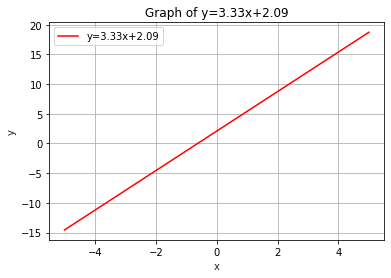

In [9]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5,5,100)
y = m1*x+c1
plt.plot(x, y, '-r', label='y='+str(m1)+'x+'+str(c1))
plt.title('Graph of '+'y='+str(m1)+'x+'+str(c1))
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()